
# Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.
# Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# Submission File Format
The file should contain a header and have the following format:

ImageId,Label
* 1,0
* 2,0
* 3,0
* etc.


<a id="数据集"></a> <br>
# 数据集概览
* 在本教程中，我们将使用“手语数字数据集”。
* 该数据集中包含2062张手语数字图片。
* 数字范围是从0到9。因此共有10个不同的手势。
* 为了简化起见，我们仅使用手势0和1。
* 准备我们的X和Y数组。X是图像数组（手势零和一手势），Y是标签数组（0和1）。

在这个程序中，我们不采用任何锐化手段，但是加入mnist的七万个数据集进行训练

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [ ]:
# 先用pandas读入csv
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv') # 导入原始训练集
Y = df.iloc[:, 0].values  # 标签数据
X = df.iloc[:, 1:].values  # 特征数据
Y_test = df.iloc[:, 0].values   # 标签数据
X_test = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X)
np.save("Y.npy", Y)
X_train = np.load('X.npy')
Y_train = np.load('Y.npy')

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("数据形状:", X_train.shape) 
print("数据形状:", Y_train.shape) 
print("数据形状:", X_test.shape) 
print("数据形状:", Y_test.shape) 

数据形状: (42000, 784)
数据形状: (42000,)
数据形状: (42000, 784)
数据形状: (42000,)


数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

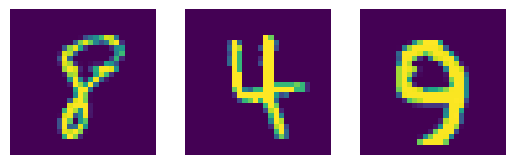

In [10]:
# load data set
img_size = 28
dataX = np.load('X.npy') # 查看数据形状
print("数据形状:", dataX.shape) # 打印前五行数据 
print(dataX[:10])
dataY = np.load('Y.npy') # 查看数据形状
print("数据形状:", dataY.shape) # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[290].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dataX[950].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dataX[1560].reshape(img_size, img_size))
plt.axis('off')

* 为手势零的图像创建标签数组，其值为0，为一手势的图像创建标签数组，其值为1

In [11]:
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
print("Y_test shape: ", Y_test.shape)
print("Y_train shape: ", Y_train.shape)
print("X_shape: " , X.shape)
print("Y_shape: " , Y.shape)
print("X_test shape: " , X_test.shape)
print("Y_test shape: " , Y_test.shape)

Y_test shape:  (42000, 1)
Y_train shape:  (42000, 1)
X_shape:  (42000, 784)
Y_shape:  (42000,)
X_test shape:  (42000, 784)
Y_test shape:  (42000, 1)


In [12]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("X_train number: " , number_of_train)
print("X_test number: " , number_of_test)

X_train number:  35700
X_test number:  6300


* 现在我们有3维的输入数组（X），为了将其作为感知机模型的输入，我们需要将其展平为2维
* 我们的标签数组（Y）已经是展平的（2D），所以我们保持不变。
* 将X数组（图像数组）展平。


In [13]:
# X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
# X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
# print("X train flatten",X_train_flatten.shape)
# print("X test flatten",X_test_flatten.shape)

* 为方便后续矩阵乘法的计算，对样本矩阵进行转置

In [14]:
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (35700, 784)
x test:  (6300, 784)
y train:  (35700,)
y test:  (6300,)


<!-- <a id="10"></a> <br>
# 深度神经网络(DNN)
* 2-layer 感知机: 
    * 神经网络结构： 包括输入层、一个或多个隐藏层以及输出层。
    * 激活函数： 激活函数提供了非线性变换，使模型具备拟合复杂数据的能力。tanh激活函数比sigmoid更适合用于隐藏单元，因为它的输出均值更接近于零，从而更好地中心化数据以供下一层使用。

<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>

   
    
     -->

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 创建卷积神经网络模型
Size_of_Core = 5

model = Sequential(
    [
        # 第一层卷积层：32个5x5的卷积核，激活函数ReLU，填充方式为SAME
        Conv2D(
            32,
            (Size_of_Core, Size_of_Core),
            activation="relu",
            input_shape=(28, 28, 1),
            padding="same",
        ),
        # 第一层池化层：2x2最大池化
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),  # 添加Dropout层，防止过拟合
        # 第二层卷积层：64个5x5的卷积核，激活函数ReLU，填充方式为SAME
        Conv2D(64, (Size_of_Core, Size_of_Core), activation="relu", padding="same"),
        # 第二层池化层：2x2最大池化
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        # 第三层卷积层：128个5x5的卷积核，激活函数ReLU，填充方式为SAME
        Conv2D(128, (Size_of_Core, Size_of_Core), activation="relu", padding="same"),
        # 第三层池化层：2x2最大池化
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        # 展平层，将二维图像数据展平为一维
        Flatten(),
        # 全连接层：128个神经元，激活函数ReLU
        Dense(128, activation="relu"),
        Dropout(0.5),  # 再次添加Dropout层
        # 输出层：10个神经元（对应10个分类），激活函数Softmax
        Dense(10, activation="softmax"),
    ]
)

# 数据增强
datagen = ImageDataGenerator(
    rotation_range=10,  # 随机旋转范围
    width_shift_range=0.1,  # 水平移动
    height_shift_range=0.1,  # 垂直移动
    shear_range=0.1,  # 剪切变换程度
    zoom_range=0.1,  # 放大/缩小
    horizontal_flip=False,  # 水平翻转
    fill_mode="nearest",  # 填充模式
)

# 打印模型摘要，检查各层的输出形状
model.summary()

# 导入 MNIST 数据集
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = (
    tf.keras.datasets.mnist.load_data()
)

# 将 MNIST 数据集的维度调整为 (28, 28, 1)，并进行归一化处理
X_train_mnist = (
    X_train_mnist.reshape(X_train_mnist.shape[0], 28, 28, 1).astype("float32") / 255.0
)
X_test_mnist = (
    X_test_mnist.reshape(X_test_mnist.shape[0], 28, 28, 1).astype("float32") / 255.0
)

# 假设你已经有了自己的训练数据 X_train 和 y_train
# 处理现有的训练数据 X_train（假设它是二维的）
X_train = (
    X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32") / 255.0
)  # 调整为 (num_samples, 28, 28, 1)
# 合并现有的训练数据和 MNIST 数据集
X_train_combined = np.concatenate(
    (X_train, X_train_mnist), axis=0
)  # 将 X_train 和 X_train_mnist 合并
y_train_combined = np.concatenate(
    (y_train, y_train_mnist), axis=0
)  # 将 y_train 和 y_train_mnist 合并

# 编译模型
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

# 使用数据增强进行训练
datagen.fit(X_train_combined)
model.fit(
    datagen.flow(X_train_combined, y_train_combined, batch_size=32),
    epochs=20,
    validation_data=(X_test_mnist, y_test_mnist),  # 用 MNIST 测试集验证
)

# 在测试数据上进行评估
test_loss, test_acc = model.evaluate(X_test_mnist, y_test_mnist)
print(f"Test accuracy: {test_acc:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 405,898 (1.55 MB)

 Trainable params: 405,898 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.8401 - loss: 0.4769 - val_accuracy: 0.9895 - val_loss: 0.0311
Epoch 2/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.9750 - loss: 0.0891 - val_accuracy: 0.9922 - val_loss: 0.0229
Epoch 3/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9793 - loss: 0.0729 - val_accuracy: 0.9940 - val_loss: 0.0187
Epoch 4/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9829 - loss: 0.0626 - val_accuracy: 0.9943 - val_loss: 0.0176
Epoch 5/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 47s 16ms/step - accuracy: 0.9843 - loss: 0.0558 - val_accuracy: 0.9947 - val_loss: 0.0164
Epoch 6/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 86s 29ms/step - accuracy: 0.9840 - loss: 0.0591 - val_accuracy: 0.9938 - val_loss: 0.0202
Epoch 7/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - accuracy: 0.9854 - loss: 0.0540 - val_accuracy: 0.9949 - val_loss: 0.0153
Epoch 8/20
2991/2991 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.9861 -

下面对测试集进行预测

In [16]:
test_df = pd.read_csv("test.csv")
test_X = test_df.iloc[:, :].values
print("数据形状:", test_X.shape)

数据形状: (28000, 784)


In [17]:
test_X_2D = np.array([test_X[i].reshape(28, 28) for i in range(28000)])
test_X_2D.shape

(28000, 28, 28)

In [18]:
test_number = test_X_2D.shape[0]
test_X_2D = (
    test_X_2D.reshape(test_number, 28, 28, 1).astype("float32") / 255.0
)
print(test_X_2D.shape)
print(test_X_2D[0])

(28000, 28, 28, 1)
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  

In [19]:
# 假设 prediction 是模型预测的结果
prediction = model.predict(test_X_2D)

# 获取最大值的索引作为预测的类别
predicted_class = np.argmax(prediction, axis=-1)

# 将预测结果转换为 DataFrame
output_df = pd.DataFrame(predicted_class, columns=["Label"])

# 添加 ImageId 列，假设它是从 1 开始的
output_df["ImageId"] = output_df.index + 1

# 重新排列列顺序，以确保 'ImageId' 在前
output_df = output_df[["ImageId", "Label"]]

# 将 DataFrame 写入 CSV 文件
output_df.to_csv("output_CNN.csv", index=False, header=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step
